# Enumerate all microstates

The goal of the computations in this notebook is to enumerate all 15037 non-symmetric chain conformations of the 12mer HPHPHPHPPHPH with a bead-specific energy function, and organize the results by macrostate (unique contact state).

### Energy function 

Each bead $i$ gets an epsilon value $\epsilon_i$ (in units kT), and the total energy of the chain is

$$ U = \sum_{{i,j} \text{in contact}} -(\epsilon_i \epsilon_j)^{1/2}$$.

The polar (P) beads have $\epsilon$ set to zero, and each of the 6 hydrophobic (H) beads have unique values:

$$ \vec{\epsilon} = (3, 0, 2, 0, 1, 0, 4, 0, 0, 1.5, 0, 5) $$.


## Microstates

For each microstate, we will record the conformation of the microstate, its contact state, and all pairwise distances.  (NOTE: For BICePs, I recommend using only the distances $d_{ij}$ between beads $i$ and $j$ where |i-j| >= 3 to compute ensemble-averages and distributions.  This is an (upper) triangular subsection of the full pairwise distance matrix).

### Output

Microstate conformations are written to file `microstate_coords.npy`.  This contains a 15037 x 12 x 2 np.array of coordinates.


## Macrostates 

The microstates are binned into 72 *macrostates*, each defined as having a unique set of contacts.  Since the energy function depends only on the contacts that are made, each microstate belonging to a given macrostate has the same energy.

### Output

The file `microstates.txt` contains macrostate definitions and their microstate multiplicities:

```
macrostate_index	contact_state	energy(kT)	multiplicity
0	[]	0.0	11460
1	[(0, 9)]	-2.1213203435596424	188
2	[(0, 11)]	-3.872983346207417	178
3	[(2, 9)]	-1.7320508075688772	107
4	[(2, 11)]	-3.1622776601683795	103
...
68	[(0, 11), (4, 11), (6, 9), (6, 11)]	-13.030677021489964	2
69	[(2, 11), (4, 9), (4, 11), (6, 9)]	-9.072580251842936	5
70	[(2, 11), (4, 11), (6, 9), (6, 11)]	-12.319971335450926	5
71	[(0, 11), (2, 11), (4, 9), (4, 11), (6, 9)]	-12.945563598050352	1
```

Macrostate assignments (macrostate indices for each microstate) are saved in `macrostate_assignments.txt`.  This is a 15037-line text file, where each line contains the macrostate index.

Average pairwise distances and squared-distances of each macrostate are saved to the directory `macrostate_distances`:

```
macrostate_distances/
    macro00.dist.npy
    macro00.sqdist.npy
    macro01.dist.npy
    macro01.sqdist.npy
    ...
    macro71.dist.npy
    macro71.sqdist.npy
```
The squared distances are useful to get a sense of the variance of distance distributions across microstates belonging to a given macrostate, because the variance can be computed as $<d_{ij}^2> - <d_{ij}>^2$.


## State populations and experimental observables

Given the energy $E_k$ (in units kT) of each macrostate $k$, and multiplicity $g_k$, the state populations are computed as

$$ p_k = \frac{g_k \exp(-E_k)}{Z}  $$

where $Z = \sum_k g_k \exp(-E_k)$. 

State populations are written to file `macrostate_populations.txt`.

The ensemble-averaged distance observables (and the variance of their distribution) are computed as

$$ <d_{ij}> = \sum_k p_k (d_{ij})_k $$
$$ \sigma^2(<d_{ij}>) = \sum_k p_k^2 \sigma^2((d_{ij})_k) $$

Where $(d_{ij})_k$ are the average distances for the $k^{th}$ macrostate.

These are written to file as `obs_distances.npy` and `obs_distances_std.npy`.


### Requirements

This notebook requires `scipy`

In [1]:
import numpy as np
eps_beads = np.array([3, 0, 2, 0, 1, 0, 4, 0, 0, 1.5, 0, 5])
bead_pair_energies_squared = np.outer(eps_beads,eps_beads)
print('bead_pair_energies_squared =', bead_pair_energies_squared)
bead_pair_energies = -1.0*(bead_pair_energies_squared)**0.5


bead_pair_energies_squared = [[ 9.    0.    6.    0.    3.    0.   12.    0.    0.    4.5   0.   15.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 6.    0.    4.    0.    2.    0.    8.    0.    0.    3.    0.   10.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 3.    0.    2.    0.    1.    0.    4.    0.    0.    1.5   0.    5.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [12.    0.    8.    0.    4.    0.   16.    0.    0.    6.    0.   20.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 4.5   0.    3.    0.    1.5   0.    6.    0.    0.    2.25  0.    7.5 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [15.    0.   10.    0.    5.    0.   20.    0.    0.    7.5   0.   25.  ]]



For each microstate, the following will be computed:

* all pairwise distances
* energy


```
(base) vv@cst14330 enumeration % cat enumerate12.conf 
HPSTRING                HPHPHPHPPHPH
INITIALVEC              [0,0,0,0,0,0,0,0,0,0,0]
randseed                345
eps                     -5.0
NREPLICAS               1
REPLICATEMPS            [300.0]
EXPDIR                  ./enumerate12_results
PRINTEVERY              1000
TRJEVERY                1000
ENEEVERY                1000
NATIVEDIR               /Users/vincentvoelz/scripts/HPSandbox/sequences/clist/hp12
```


In [2]:
import sys
sys.path.append('../../')

from hpsandbox import Chain, Config, Monty, Replica, Trajectory

import random
import string
import math
import os

from scipy import spatial

randseed = 1
g = random.Random(randseed)

VERBOSE = 1

def energy(contact_state, bead_pair_energies):
    """Given a contact state (a list of tuples for each contact) and a matrix
    of bead_pair_energies, return the energy of the chain."""
    
    result = 0.0
    for (i,j) in contact_state:
        # print('contact', i, j)
        result += bead_pair_energies[i,j]
    return result

def distances(coords):
    """Given the 2D coordinates of the chain, return all pairwise distances."""
    # print(coords)
    return spatial.distance_matrix(coords,coords)
    

In [3]:

if (1):
    
    configfile = 'enumerate12.conf'
    config = Config( filename=configfile)
    if VERBOSE:
        config.print_config()
    
    # create a single Replica
    replicas = [ Replica(config,0) ]
    
    traj = Trajectory(replicas,config)    # a trajectory object to write out trajectories

    nconfs = 0
    contact_states = {}     # dictionary of {repr{contact state}: number of conformations}
    contacts = {}           # dictionary of {number of contacts: number of conformations}

    micro_state_repr = []   # a list of contact state_repr for each of the 15037 microstates
    micro_distances = []    # a 2D np.array of distances for each chain
    n_microstates = 15037
    micro_coords = np.zeros((n_microstates, 12, 2))

    #################
    #
    # This is a useful subroutine for enumerating all conformations of an HP chain
    #
    # NOTE: in order for this to work correctly, the initial starting vector must be [0,0,0,....,0]
    # 
    done = 0
    while not(done):

        if len(replicas[0].chain.vec) == replicas[0].chain.n-1:    
            if replicas[0].chain.viable:
                if replicas[0].chain.nonsym():

                    # tally the number of contacts
                    state = replicas[0].chain.contactstate()
                    ncontacts = len(state)
                    if not (ncontacts in contacts):
                        contacts[ncontacts] = 1
                    else:
                        contacts[ncontacts] = contacts[ncontacts] + 1
                        
                    # compute the energy of the chain
                    micro_energy = energy(state, bead_pair_energies)
                    print('microstate', nconfs, 'energy =', micro_energy, end=' ')
                    
                    # compute all pairwise distances
                    these_distances = distances(replicas[0].chain.coords)
                    print('distances.shape', these_distances.shape)
                    micro_distances.append(these_distances)
                    
                    # tally the coordinates for this microstate
                    micro_coords[nconfs,:,:] = replicas[0].chain.coords
                    
                    # tally the multiplicity of contact state
                    this_state_repr = repr(state)
                    micro_state_repr.append(this_state_repr)
                    if not (this_state_repr in contact_states):
                        contact_states[this_state_repr] = 1
                    else:
                        contact_states[this_state_repr] = contact_states[this_state_repr] + 1

                    # tally the number of conformations
                    nconfs = nconfs + 1

                    # write to trajectory
                    if (nconfs % config.TRJEVERY) == 0:
                        traj.queue_trj(replicas[0])
                    # print progress
                    if (nconfs % config.PRINTEVERY) == 0:
                        print('%-4d confs  %s'%(nconfs,replicas[0].chain.vec))
    
                done = replicas[0].chain.shift()

            else:
                done = replicas[0].chain.shift()

        else:
            if replicas[0].chain.viable:
                replicas[0].chain.grow()
            else:
                done = replicas[0].chain.shift()

        if replicas[0].chain.vec[0] == 1:    # skip the other symmetries
            break
            
    #
    #
    #################
            
    # write the last of the trj and ene buffers
    # and close all the open trajectory file handles
    traj.cleanup(replicas)
    
    # write the 15037 x 12 x 2 microstate coordinate array for all chain conformations
    outfile = 'microstate_coords.npy'
    np.save(outfile, micro_coords)



#--------------Reading non-default Config.py file...--------------#
Configuration parameters from enumerate12.conf:

HPSTRING                       'HPHPHPHPPHPH'
INITIALVEC                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
randseed                       345
eps                            -5.0
RESTRAINED_STATE               [(1, 4), (6, 9)]
KSPRING                        0.0
NREPLICAS                      1
REPLICATEMPS                   [300.0]
MCSTEPS                        500000
SWAPEVERY                      500000
SWAPMETHOD                     'random pair'
MOVESET                        'MS2'
EXPDIR                         './enumerate12_results'
PRINTEVERY                     1000
TRJEVERY                       1000
ENEEVERY                       1000
NATIVEDIR                      '/Users/vincentvoelz/scripts/HPSandbox/sequences/clist/hp12'
STOPATNATIVE                   1
	Initializing Chain.py object...
	creating Monty.py object....
microstate 0 energy = 0.0 distances.

microstate 247 energy = 0.0 distances.shape (12, 12)
microstate 248 energy = 0.0 distances.shape (12, 12)
microstate 249 energy = 0.0 distances.shape (12, 12)
microstate 250 energy = 0.0 distances.shape (12, 12)
microstate 251 energy = 0.0 distances.shape (12, 12)
microstate 252 energy = -3.1622776601683795 distances.shape (12, 12)
microstate 253 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 254 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 255 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 256 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 257 energy = -5.605034153776295 distances.shape (12, 12)
microstate 258 energy = 0.0 distances.shape (12, 12)
microstate 259 energy = 0.0 distances.shape (12, 12)
microstate 260 energy = 0.0 distances.shape (12, 12)
microstate 261 energy = 0.0 distances.shape (12, 12)
microstate 262 energy = 0.0 distances.shape (12, 12)
microstate 263 energy = 0.0 distances.shape (12, 12)
micr

microstate 490 energy = -1.224744871391589 distances.shape (12, 12)
microstate 491 energy = -3.4608128488913787 distances.shape (12, 12)
microstate 492 energy = -1.224744871391589 distances.shape (12, 12)
microstate 493 energy = 0.0 distances.shape (12, 12)
microstate 494 energy = 0.0 distances.shape (12, 12)
microstate 495 energy = 0.0 distances.shape (12, 12)
microstate 496 energy = 0.0 distances.shape (12, 12)
microstate 497 energy = 0.0 distances.shape (12, 12)
microstate 498 energy = 0.0 distances.shape (12, 12)
microstate 499 energy = 0.0 distances.shape (12, 12)
microstate 500 energy = -4.47213595499958 distances.shape (12, 12)
microstate 501 energy = 0.0 distances.shape (12, 12)
microstate 502 energy = 0.0 distances.shape (12, 12)
microstate 503 energy = 0.0 distances.shape (12, 12)
microstate 504 energy = 0.0 distances.shape (12, 12)
microstate 505 energy = 0.0 distances.shape (12, 12)
microstate 506 energy = 0.0 distances.shape (12, 12)
microstate 507 energy = 0.0 distances.s

microstate 743 energy = -2.449489742783178 distances.shape (12, 12)
microstate 744 energy = -2.449489742783178 distances.shape (12, 12)
microstate 745 energy = -4.685557720282968 distances.shape (12, 12)
microstate 746 energy = 0.0 distances.shape (12, 12)
microstate 747 energy = 0.0 distances.shape (12, 12)
microstate 748 energy = 0.0 distances.shape (12, 12)
microstate 749 energy = 0.0 distances.shape (12, 12)
microstate 750 energy = 0.0 distances.shape (12, 12)
microstate 751 energy = 0.0 distances.shape (12, 12)
microstate 752 energy = 0.0 distances.shape (12, 12)
microstate 753 energy = 0.0 distances.shape (12, 12)
microstate 754 energy = -2.449489742783178 distances.shape (12, 12)
microstate 755 energy = -2.449489742783178 distances.shape (12, 12)
microstate 756 energy = -2.449489742783178 distances.shape (12, 12)
microstate 757 energy = -2.449489742783178 distances.shape (12, 12)
microstate 758 energy = 0.0 distances.shape (12, 12)
microstate 759 energy = 0.0 distances.shape (12

microstate 989 energy = 0.0 distances.shape (12, 12)
microstate 990 energy = 0.0 distances.shape (12, 12)
microstate 991 energy = 0.0 distances.shape (12, 12)
microstate 992 energy = 0.0 distances.shape (12, 12)
microstate 993 energy = 0.0 distances.shape (12, 12)
microstate 994 energy = 0.0 distances.shape (12, 12)
microstate 995 energy = 0.0 distances.shape (12, 12)
microstate 996 energy = 0.0 distances.shape (12, 12)
microstate 997 energy = 0.0 distances.shape (12, 12)
microstate 998 energy = 0.0 distances.shape (12, 12)
microstate 999 energy = 0.0 distances.shape (12, 12)
1000 confs  [0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2]
microstate 1000 energy = 0.0 distances.shape (12, 12)
microstate 1001 energy = 0.0 distances.shape (12, 12)
microstate 1002 energy = 0.0 distances.shape (12, 12)
microstate 1003 energy = -6.708203932499369 distances.shape (12, 12)
microstate 1004 energy = 0.0 distances.shape (12, 12)
microstate 1005 energy = -5.39834563766817 distances.shape (12, 12)
microstate 1006 en

microstate 1239 energy = 0.0 distances.shape (12, 12)
microstate 1240 energy = 0.0 distances.shape (12, 12)
microstate 1241 energy = 0.0 distances.shape (12, 12)
microstate 1242 energy = 0.0 distances.shape (12, 12)
microstate 1243 energy = -4.47213595499958 distances.shape (12, 12)
microstate 1244 energy = 0.0 distances.shape (12, 12)
microstate 1245 energy = 0.0 distances.shape (12, 12)
microstate 1246 energy = 0.0 distances.shape (12, 12)
microstate 1247 energy = 0.0 distances.shape (12, 12)
microstate 1248 energy = 0.0 distances.shape (12, 12)
microstate 1249 energy = 0.0 distances.shape (12, 12)
microstate 1250 energy = 0.0 distances.shape (12, 12)
microstate 1251 energy = 0.0 distances.shape (12, 12)
microstate 1252 energy = 0.0 distances.shape (12, 12)
microstate 1253 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1254 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1255 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1256 energy 

microstate 1489 energy = -4.47213595499958 distances.shape (12, 12)
microstate 1490 energy = 0.0 distances.shape (12, 12)
microstate 1491 energy = 0.0 distances.shape (12, 12)
microstate 1492 energy = 0.0 distances.shape (12, 12)
microstate 1493 energy = 0.0 distances.shape (12, 12)
microstate 1494 energy = 0.0 distances.shape (12, 12)
microstate 1495 energy = 0.0 distances.shape (12, 12)
microstate 1496 energy = 0.0 distances.shape (12, 12)
microstate 1497 energy = 0.0 distances.shape (12, 12)
microstate 1498 energy = 0.0 distances.shape (12, 12)
microstate 1499 energy = 0.0 distances.shape (12, 12)
microstate 1500 energy = 0.0 distances.shape (12, 12)
microstate 1501 energy = 0.0 distances.shape (12, 12)
microstate 1502 energy = 0.0 distances.shape (12, 12)
microstate 1503 energy = 0.0 distances.shape (12, 12)
microstate 1504 energy = 0.0 distances.shape (12, 12)
microstate 1505 energy = -3.872983346207417 distances.shape (12, 12)
microstate 1506 energy = -5.39834563766817 distances.

microstate 1739 energy = 0.0 distances.shape (12, 12)
microstate 1740 energy = 0.0 distances.shape (12, 12)
microstate 1741 energy = 0.0 distances.shape (12, 12)
microstate 1742 energy = 0.0 distances.shape (12, 12)
microstate 1743 energy = 0.0 distances.shape (12, 12)
microstate 1744 energy = 0.0 distances.shape (12, 12)
microstate 1745 energy = 0.0 distances.shape (12, 12)
microstate 1746 energy = 0.0 distances.shape (12, 12)
microstate 1747 energy = -4.47213595499958 distances.shape (12, 12)
microstate 1748 energy = 0.0 distances.shape (12, 12)
microstate 1749 energy = -3.872983346207417 distances.shape (12, 12)
microstate 1750 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1751 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1752 energy = -6.322473088990595 distances.shape (12, 12)
microstate 1753 energy = -6.322473088990595 distances.shape (12, 12)
microstate 1754 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1755 energy = -2.4494

microstate 1989 energy = 0.0 distances.shape (12, 12)
microstate 1990 energy = 0.0 distances.shape (12, 12)
microstate 1991 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1992 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1993 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1994 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1995 energy = -6.9216256977827575 distances.shape (12, 12)
microstate 1996 energy = -2.449489742783178 distances.shape (12, 12)
microstate 1997 energy = 0.0 distances.shape (12, 12)
microstate 1998 energy = 0.0 distances.shape (12, 12)
microstate 1999 energy = 0.0 distances.shape (12, 12)
2000 confs  [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3]
microstate 2000 energy = 0.0 distances.shape (12, 12)
microstate 2001 energy = 0.0 distances.shape (12, 12)
microstate 2002 energy = 0.0 distances.shape (12, 12)
microstate 2003 energy = 0.0 distances.shape (12, 12)
microstate 2004 energy = -4.47213595499958 distances.

microstate 2253 energy = 0.0 distances.shape (12, 12)
microstate 2254 energy = 0.0 distances.shape (12, 12)
microstate 2255 energy = -3.872983346207417 distances.shape (12, 12)
microstate 2256 energy = -3.872983346207417 distances.shape (12, 12)
microstate 2257 energy = 0.0 distances.shape (12, 12)
microstate 2258 energy = 0.0 distances.shape (12, 12)
microstate 2259 energy = 0.0 distances.shape (12, 12)
microstate 2260 energy = 0.0 distances.shape (12, 12)
microstate 2261 energy = 0.0 distances.shape (12, 12)
microstate 2262 energy = 0.0 distances.shape (12, 12)
microstate 2263 energy = 0.0 distances.shape (12, 12)
microstate 2264 energy = 0.0 distances.shape (12, 12)
microstate 2265 energy = 0.0 distances.shape (12, 12)
microstate 2266 energy = 0.0 distances.shape (12, 12)
microstate 2267 energy = 0.0 distances.shape (12, 12)
microstate 2268 energy = 0.0 distances.shape (12, 12)
microstate 2269 energy = 0.0 distances.shape (12, 12)
microstate 2270 energy = 0.0 distances.shape (12, 12

microstate 2488 energy = -9.157693675282548 distances.shape (12, 12)
microstate 2489 energy = -2.449489742783178 distances.shape (12, 12)
microstate 2490 energy = 0.0 distances.shape (12, 12)
microstate 2491 energy = 0.0 distances.shape (12, 12)
microstate 2492 energy = 0.0 distances.shape (12, 12)
microstate 2493 energy = 0.0 distances.shape (12, 12)
microstate 2494 energy = 0.0 distances.shape (12, 12)
microstate 2495 energy = 0.0 distances.shape (12, 12)
microstate 2496 energy = 0.0 distances.shape (12, 12)
microstate 2497 energy = -4.47213595499958 distances.shape (12, 12)
microstate 2498 energy = 0.0 distances.shape (12, 12)
microstate 2499 energy = 0.0 distances.shape (12, 12)
microstate 2500 energy = 0.0 distances.shape (12, 12)
microstate 2501 energy = 0.0 distances.shape (12, 12)
microstate 2502 energy = 0.0 distances.shape (12, 12)
microstate 2503 energy = 0.0 distances.shape (12, 12)
microstate 2504 energy = 0.0 distances.shape (12, 12)
microstate 2505 energy = 0.0 distances

microstate 2727 energy = 0.0 distances.shape (12, 12)
microstate 2728 energy = 0.0 distances.shape (12, 12)
microstate 2729 energy = 0.0 distances.shape (12, 12)
microstate 2730 energy = 0.0 distances.shape (12, 12)
microstate 2731 energy = 0.0 distances.shape (12, 12)
microstate 2732 energy = 0.0 distances.shape (12, 12)
microstate 2733 energy = 0.0 distances.shape (12, 12)
microstate 2734 energy = 0.0 distances.shape (12, 12)
microstate 2735 energy = 0.0 distances.shape (12, 12)
microstate 2736 energy = 0.0 distances.shape (12, 12)
microstate 2737 energy = 0.0 distances.shape (12, 12)
microstate 2738 energy = 0.0 distances.shape (12, 12)
microstate 2739 energy = 0.0 distances.shape (12, 12)
microstate 2740 energy = -3.872983346207417 distances.shape (12, 12)
microstate 2741 energy = 0.0 distances.shape (12, 12)
microstate 2742 energy = 0.0 distances.shape (12, 12)
microstate 2743 energy = -3.872983346207417 distances.shape (12, 12)
microstate 2744 energy = -3.872983346207417 distance

microstate 2985 energy = -9.157693675282548 distances.shape (12, 12)
microstate 2986 energy = 0.0 distances.shape (12, 12)
microstate 2987 energy = 0.0 distances.shape (12, 12)
microstate 2988 energy = 0.0 distances.shape (12, 12)
microstate 2989 energy = 0.0 distances.shape (12, 12)
microstate 2990 energy = 0.0 distances.shape (12, 12)
microstate 2991 energy = 0.0 distances.shape (12, 12)
microstate 2992 energy = 0.0 distances.shape (12, 12)
microstate 2993 energy = 0.0 distances.shape (12, 12)
microstate 2994 energy = -5.605034153776295 distances.shape (12, 12)
microstate 2995 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 2996 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 2997 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 2998 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 2999 energy = 0.0 distances.shape (12, 12)
3000 confs  [0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0]
microstate 3000 energy = 0.0 distances.shape (12, 

microstate 3238 energy = -2.449489742783178 distances.shape (12, 12)
microstate 3239 energy = -4.685557720282968 distances.shape (12, 12)
microstate 3240 energy = 0.0 distances.shape (12, 12)
microstate 3241 energy = 0.0 distances.shape (12, 12)
microstate 3242 energy = 0.0 distances.shape (12, 12)
microstate 3243 energy = 0.0 distances.shape (12, 12)
microstate 3244 energy = 0.0 distances.shape (12, 12)
microstate 3245 energy = 0.0 distances.shape (12, 12)
microstate 3246 energy = 0.0 distances.shape (12, 12)
microstate 3247 energy = 0.0 distances.shape (12, 12)
microstate 3248 energy = -5.611767402951557 distances.shape (12, 12)
microstate 3249 energy = -2.449489742783178 distances.shape (12, 12)
microstate 3250 energy = -5.611767402951557 distances.shape (12, 12)
microstate 3251 energy = -2.449489742783178 distances.shape (12, 12)
microstate 3252 energy = 0.0 distances.shape (12, 12)
microstate 3253 energy = 0.0 distances.shape (12, 12)
microstate 3254 energy = 0.0 distances.shape (

microstate 3488 energy = 0.0 distances.shape (12, 12)
microstate 3489 energy = 0.0 distances.shape (12, 12)
microstate 3490 energy = 0.0 distances.shape (12, 12)
microstate 3491 energy = 0.0 distances.shape (12, 12)
microstate 3492 energy = 0.0 distances.shape (12, 12)
microstate 3493 energy = -6.708203932499369 distances.shape (12, 12)
microstate 3494 energy = 0.0 distances.shape (12, 12)
microstate 3495 energy = -2.23606797749979 distances.shape (12, 12)
microstate 3496 energy = -3.674234614174767 distances.shape (12, 12)
microstate 3497 energy = -3.674234614174767 distances.shape (12, 12)
microstate 3498 energy = -5.910302591674556 distances.shape (12, 12)
microstate 3499 energy = -2.449489742783178 distances.shape (12, 12)
microstate 3500 energy = -2.449489742783178 distances.shape (12, 12)
microstate 3501 energy = -6.9216256977827575 distances.shape (12, 12)
microstate 3502 energy = -2.449489742783178 distances.shape (12, 12)
microstate 3503 energy = -2.449489742783178 distances.s

microstate 3762 energy = 0.0 distances.shape (12, 12)
microstate 3763 energy = 0.0 distances.shape (12, 12)
microstate 3764 energy = 0.0 distances.shape (12, 12)
microstate 3765 energy = 0.0 distances.shape (12, 12)
microstate 3766 energy = 0.0 distances.shape (12, 12)
microstate 3767 energy = 0.0 distances.shape (12, 12)
microstate 3768 energy = 0.0 distances.shape (12, 12)
microstate 3769 energy = 0.0 distances.shape (12, 12)
microstate 3770 energy = 0.0 distances.shape (12, 12)
microstate 3771 energy = 0.0 distances.shape (12, 12)
microstate 3772 energy = 0.0 distances.shape (12, 12)
microstate 3773 energy = 0.0 distances.shape (12, 12)
microstate 3774 energy = -2.23606797749979 distances.shape (12, 12)
microstate 3775 energy = 0.0 distances.shape (12, 12)
microstate 3776 energy = 0.0 distances.shape (12, 12)
microstate 3777 energy = 0.0 distances.shape (12, 12)
microstate 3778 energy = 0.0 distances.shape (12, 12)
microstate 3779 energy = 0.0 distances.shape (12, 12)
microstate 378

microstate 4030 energy = 0.0 distances.shape (12, 12)
microstate 4031 energy = 0.0 distances.shape (12, 12)
microstate 4032 energy = 0.0 distances.shape (12, 12)
microstate 4033 energy = 0.0 distances.shape (12, 12)
microstate 4034 energy = 0.0 distances.shape (12, 12)
microstate 4035 energy = 0.0 distances.shape (12, 12)
microstate 4036 energy = 0.0 distances.shape (12, 12)
microstate 4037 energy = 0.0 distances.shape (12, 12)
microstate 4038 energy = -4.47213595499958 distances.shape (12, 12)
microstate 4039 energy = 0.0 distances.shape (12, 12)
microstate 4040 energy = 0.0 distances.shape (12, 12)
microstate 4041 energy = 0.0 distances.shape (12, 12)
microstate 4042 energy = 0.0 distances.shape (12, 12)
microstate 4043 energy = 0.0 distances.shape (12, 12)
microstate 4044 energy = 0.0 distances.shape (12, 12)
microstate 4045 energy = 0.0 distances.shape (12, 12)
microstate 4046 energy = 0.0 distances.shape (12, 12)
microstate 4047 energy = 0.0 distances.shape (12, 12)
microstate 404

microstate 4297 energy = -3.872983346207417 distances.shape (12, 12)
microstate 4298 energy = 0.0 distances.shape (12, 12)
microstate 4299 energy = 0.0 distances.shape (12, 12)
microstate 4300 energy = 0.0 distances.shape (12, 12)
microstate 4301 energy = -3.872983346207417 distances.shape (12, 12)
microstate 4302 energy = 0.0 distances.shape (12, 12)
microstate 4303 energy = -3.872983346207417 distances.shape (12, 12)
microstate 4304 energy = 0.0 distances.shape (12, 12)
microstate 4305 energy = 0.0 distances.shape (12, 12)
microstate 4306 energy = 0.0 distances.shape (12, 12)
microstate 4307 energy = 0.0 distances.shape (12, 12)
microstate 4308 energy = 0.0 distances.shape (12, 12)
microstate 4309 energy = -3.872983346207417 distances.shape (12, 12)
microstate 4310 energy = 0.0 distances.shape (12, 12)
microstate 4311 energy = -3.872983346207417 distances.shape (12, 12)
microstate 4312 energy = -2.1213203435596424 distances.shape (12, 12)
microstate 4313 energy = -2.1213203435596424 

microstate 4545 energy = 0.0 distances.shape (12, 12)
microstate 4546 energy = 0.0 distances.shape (12, 12)
microstate 4547 energy = 0.0 distances.shape (12, 12)
microstate 4548 energy = -3.1622776601683795 distances.shape (12, 12)
microstate 4549 energy = 0.0 distances.shape (12, 12)
microstate 4550 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 4551 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 4552 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 4553 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 4554 energy = -4.894328467737257 distances.shape (12, 12)
microstate 4555 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 4556 energy = 0.0 distances.shape (12, 12)
microstate 4557 energy = 0.0 distances.shape (12, 12)
microstate 4558 energy = 0.0 distances.shape (12, 12)
microstate 4559 energy = 0.0 distances.shape (12, 12)
microstate 4560 energy = 0.0 distances.shape (12, 12)
microstate 4561 energy = 

microstate 4820 energy = 0.0 distances.shape (12, 12)
microstate 4821 energy = 0.0 distances.shape (12, 12)
microstate 4822 energy = 0.0 distances.shape (12, 12)
microstate 4823 energy = 0.0 distances.shape (12, 12)
microstate 4824 energy = 0.0 distances.shape (12, 12)
microstate 4825 energy = 0.0 distances.shape (12, 12)
microstate 4826 energy = 0.0 distances.shape (12, 12)
microstate 4827 energy = 0.0 distances.shape (12, 12)
microstate 4828 energy = 0.0 distances.shape (12, 12)
microstate 4829 energy = 0.0 distances.shape (12, 12)
microstate 4830 energy = 0.0 distances.shape (12, 12)
microstate 4831 energy = 0.0 distances.shape (12, 12)
microstate 4832 energy = 0.0 distances.shape (12, 12)
microstate 4833 energy = 0.0 distances.shape (12, 12)
microstate 4834 energy = -4.47213595499958 distances.shape (12, 12)
microstate 4835 energy = 0.0 distances.shape (12, 12)
microstate 4836 energy = 0.0 distances.shape (12, 12)
microstate 4837 energy = 0.0 distances.shape (12, 12)
microstate 483

microstate 5071 energy = 0.0 distances.shape (12, 12)
microstate 5072 energy = 0.0 distances.shape (12, 12)
microstate 5073 energy = 0.0 distances.shape (12, 12)
microstate 5074 energy = 0.0 distances.shape (12, 12)
microstate 5075 energy = 0.0 distances.shape (12, 12)
microstate 5076 energy = 0.0 distances.shape (12, 12)
microstate 5077 energy = 0.0 distances.shape (12, 12)
microstate 5078 energy = 0.0 distances.shape (12, 12)
microstate 5079 energy = 0.0 distances.shape (12, 12)
microstate 5080 energy = 0.0 distances.shape (12, 12)
microstate 5081 energy = 0.0 distances.shape (12, 12)
microstate 5082 energy = 0.0 distances.shape (12, 12)
microstate 5083 energy = -3.872983346207417 distances.shape (12, 12)
microstate 5084 energy = 0.0 distances.shape (12, 12)
microstate 5085 energy = 0.0 distances.shape (12, 12)
microstate 5086 energy = 0.0 distances.shape (12, 12)
microstate 5087 energy = -3.872983346207417 distances.shape (12, 12)
microstate 5088 energy = 0.0 distances.shape (12, 12

microstate 5320 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5321 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5322 energy = -4.685557720282968 distances.shape (12, 12)
microstate 5323 energy = 0.0 distances.shape (12, 12)
microstate 5324 energy = 0.0 distances.shape (12, 12)
microstate 5325 energy = 0.0 distances.shape (12, 12)
microstate 5326 energy = 0.0 distances.shape (12, 12)
microstate 5327 energy = 0.0 distances.shape (12, 12)
microstate 5328 energy = 0.0 distances.shape (12, 12)
microstate 5329 energy = 0.0 distances.shape (12, 12)
microstate 5330 energy = 0.0 distances.shape (12, 12)
microstate 5331 energy = -4.685557720282968 distances.shape (12, 12)
microstate 5332 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5333 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5334 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5335 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5336 

microstate 5582 energy = 0.0 distances.shape (12, 12)
microstate 5583 energy = 0.0 distances.shape (12, 12)
microstate 5584 energy = 0.0 distances.shape (12, 12)
microstate 5585 energy = 0.0 distances.shape (12, 12)
microstate 5586 energy = 0.0 distances.shape (12, 12)
microstate 5587 energy = -3.1622776601683795 distances.shape (12, 12)
microstate 5588 energy = -6.708203932499369 distances.shape (12, 12)
microstate 5589 energy = -3.1622776601683795 distances.shape (12, 12)
microstate 5590 energy = -3.674234614174767 distances.shape (12, 12)
microstate 5591 energy = -6.836512274343146 distances.shape (12, 12)
microstate 5592 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5593 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5594 energy = -6.9216256977827575 distances.shape (12, 12)
microstate 5595 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5596 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5597 energy = -2.449489742

microstate 5857 energy = 0.0 distances.shape (12, 12)
microstate 5858 energy = 0.0 distances.shape (12, 12)
microstate 5859 energy = 0.0 distances.shape (12, 12)
microstate 5860 energy = 0.0 distances.shape (12, 12)
microstate 5861 energy = 0.0 distances.shape (12, 12)
microstate 5862 energy = 0.0 distances.shape (12, 12)
microstate 5863 energy = 0.0 distances.shape (12, 12)
microstate 5864 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5865 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5866 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5867 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5868 energy = -9.157693675282548 distances.shape (12, 12)
microstate 5869 energy = -2.449489742783178 distances.shape (12, 12)
microstate 5870 energy = 0.0 distances.shape (12, 12)
microstate 5871 energy = 0.0 distances.shape (12, 12)
microstate 5872 energy = 0.0 distances.shape (12, 12)
microstate 5873 energy = 0.0 distances.shape (

microstate 6120 energy = 0.0 distances.shape (12, 12)
microstate 6121 energy = -7.035261006375796 distances.shape (12, 12)
microstate 6122 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 6123 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 6124 energy = -8.767311813944675 distances.shape (12, 12)
microstate 6125 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 6126 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 6127 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 6128 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 6129 energy = -8.767311813944675 distances.shape (12, 12)
microstate 6130 energy = 0.0 distances.shape (12, 12)
microstate 6131 energy = 0.0 distances.shape (12, 12)
microstate 6132 energy = 0.0 distances.shape (12, 12)
microstate 6133 energy = 0.0 distances.shape (12, 12)
microstate 6134 energy = 0.0 distances.shape (12, 12)
microstate 6135 energy = 0.0 distances.shape (12,

microstate 6402 energy = 0.0 distances.shape (12, 12)
microstate 6403 energy = 0.0 distances.shape (12, 12)
microstate 6404 energy = 0.0 distances.shape (12, 12)
microstate 6405 energy = 0.0 distances.shape (12, 12)
microstate 6406 energy = 0.0 distances.shape (12, 12)
microstate 6407 energy = 0.0 distances.shape (12, 12)
microstate 6408 energy = -2.23606797749979 distances.shape (12, 12)
microstate 6409 energy = 0.0 distances.shape (12, 12)
microstate 6410 energy = 0.0 distances.shape (12, 12)
microstate 6411 energy = 0.0 distances.shape (12, 12)
microstate 6412 energy = 0.0 distances.shape (12, 12)
microstate 6413 energy = 0.0 distances.shape (12, 12)
microstate 6414 energy = 0.0 distances.shape (12, 12)
microstate 6415 energy = 0.0 distances.shape (12, 12)
microstate 6416 energy = 0.0 distances.shape (12, 12)
microstate 6417 energy = 0.0 distances.shape (12, 12)
microstate 6418 energy = 0.0 distances.shape (12, 12)
microstate 6419 energy = 0.0 distances.shape (12, 12)
microstate 642

microstate 6643 energy = 0.0 distances.shape (12, 12)
microstate 6644 energy = 0.0 distances.shape (12, 12)
microstate 6645 energy = 0.0 distances.shape (12, 12)
microstate 6646 energy = 0.0 distances.shape (12, 12)
microstate 6647 energy = 0.0 distances.shape (12, 12)
microstate 6648 energy = 0.0 distances.shape (12, 12)
microstate 6649 energy = 0.0 distances.shape (12, 12)
microstate 6650 energy = 0.0 distances.shape (12, 12)
microstate 6651 energy = 0.0 distances.shape (12, 12)
microstate 6652 energy = 0.0 distances.shape (12, 12)
microstate 6653 energy = 0.0 distances.shape (12, 12)
microstate 6654 energy = 0.0 distances.shape (12, 12)
microstate 6655 energy = 0.0 distances.shape (12, 12)
microstate 6656 energy = 0.0 distances.shape (12, 12)
microstate 6657 energy = 0.0 distances.shape (12, 12)
microstate 6658 energy = 0.0 distances.shape (12, 12)
microstate 6659 energy = 0.0 distances.shape (12, 12)
microstate 6660 energy = -4.47213595499958 distances.shape (12, 12)
microstate 666

microstate 6912 energy = 0.0 distances.shape (12, 12)
microstate 6913 energy = 0.0 distances.shape (12, 12)
microstate 6914 energy = 0.0 distances.shape (12, 12)
microstate 6915 energy = 0.0 distances.shape (12, 12)
microstate 6916 energy = 0.0 distances.shape (12, 12)
microstate 6917 energy = 0.0 distances.shape (12, 12)
microstate 6918 energy = 0.0 distances.shape (12, 12)
microstate 6919 energy = 0.0 distances.shape (12, 12)
microstate 6920 energy = 0.0 distances.shape (12, 12)
microstate 6921 energy = -6.708203932499369 distances.shape (12, 12)
microstate 6922 energy = 0.0 distances.shape (12, 12)
microstate 6923 energy = -5.39834563766817 distances.shape (12, 12)
microstate 6924 energy = -3.674234614174767 distances.shape (12, 12)
microstate 6925 energy = -3.674234614174767 distances.shape (12, 12)
microstate 6926 energy = -9.072580251842936 distances.shape (12, 12)
microstate 6927 energy = -2.449489742783178 distances.shape (12, 12)
microstate 6928 energy = -2.449489742783178 dis

microstate 7133 energy = 0.0 distances.shape (12, 12)
microstate 7134 energy = 0.0 distances.shape (12, 12)
microstate 7135 energy = 0.0 distances.shape (12, 12)
microstate 7136 energy = 0.0 distances.shape (12, 12)
microstate 7137 energy = -3.674234614174767 distances.shape (12, 12)
microstate 7138 energy = -3.674234614174767 distances.shape (12, 12)
microstate 7139 energy = 0.0 distances.shape (12, 12)
microstate 7140 energy = 0.0 distances.shape (12, 12)
microstate 7141 energy = 0.0 distances.shape (12, 12)
microstate 7142 energy = -6.708203932499369 distances.shape (12, 12)
microstate 7143 energy = 0.0 distances.shape (12, 12)
microstate 7144 energy = 0.0 distances.shape (12, 12)
microstate 7145 energy = 0.0 distances.shape (12, 12)
microstate 7146 energy = 0.0 distances.shape (12, 12)
microstate 7147 energy = 0.0 distances.shape (12, 12)
microstate 7148 energy = 0.0 distances.shape (12, 12)
microstate 7149 energy = 0.0 distances.shape (12, 12)
microstate 7150 energy = 0.0 distance

microstate 7382 energy = 0.0 distances.shape (12, 12)
microstate 7383 energy = 0.0 distances.shape (12, 12)
microstate 7384 energy = -4.47213595499958 distances.shape (12, 12)
microstate 7385 energy = 0.0 distances.shape (12, 12)
microstate 7386 energy = 0.0 distances.shape (12, 12)
microstate 7387 energy = 0.0 distances.shape (12, 12)
microstate 7388 energy = 0.0 distances.shape (12, 12)
microstate 7389 energy = 0.0 distances.shape (12, 12)
microstate 7390 energy = 0.0 distances.shape (12, 12)
microstate 7391 energy = 0.0 distances.shape (12, 12)
microstate 7392 energy = 0.0 distances.shape (12, 12)
microstate 7393 energy = 0.0 distances.shape (12, 12)
microstate 7394 energy = 0.0 distances.shape (12, 12)
microstate 7395 energy = 0.0 distances.shape (12, 12)
microstate 7396 energy = 0.0 distances.shape (12, 12)
microstate 7397 energy = 0.0 distances.shape (12, 12)
microstate 7398 energy = 0.0 distances.shape (12, 12)
microstate 7399 energy = -4.47213595499958 distances.shape (12, 12)


microstate 7619 energy = 0.0 distances.shape (12, 12)
microstate 7620 energy = 0.0 distances.shape (12, 12)
microstate 7621 energy = 0.0 distances.shape (12, 12)
microstate 7622 energy = 0.0 distances.shape (12, 12)
microstate 7623 energy = 0.0 distances.shape (12, 12)
microstate 7624 energy = 0.0 distances.shape (12, 12)
microstate 7625 energy = -6.708203932499369 distances.shape (12, 12)
microstate 7626 energy = -2.23606797749979 distances.shape (12, 12)
microstate 7627 energy = 0.0 distances.shape (12, 12)
microstate 7628 energy = 0.0 distances.shape (12, 12)
microstate 7629 energy = 0.0 distances.shape (12, 12)
microstate 7630 energy = 0.0 distances.shape (12, 12)
microstate 7631 energy = 0.0 distances.shape (12, 12)
microstate 7632 energy = 0.0 distances.shape (12, 12)
microstate 7633 energy = 0.0 distances.shape (12, 12)
microstate 7634 energy = 0.0 distances.shape (12, 12)
microstate 7635 energy = -3.674234614174767 distances.shape (12, 12)
microstate 7636 energy = -3.6742346141

microstate 7903 energy = 0.0 distances.shape (12, 12)
microstate 7904 energy = 0.0 distances.shape (12, 12)
microstate 7905 energy = 0.0 distances.shape (12, 12)
microstate 7906 energy = -4.47213595499958 distances.shape (12, 12)
microstate 7907 energy = 0.0 distances.shape (12, 12)
microstate 7908 energy = 0.0 distances.shape (12, 12)
microstate 7909 energy = 0.0 distances.shape (12, 12)
microstate 7910 energy = 0.0 distances.shape (12, 12)
microstate 7911 energy = 0.0 distances.shape (12, 12)
microstate 7912 energy = 0.0 distances.shape (12, 12)
microstate 7913 energy = 0.0 distances.shape (12, 12)
microstate 7914 energy = 0.0 distances.shape (12, 12)
microstate 7915 energy = 0.0 distances.shape (12, 12)
microstate 7916 energy = 0.0 distances.shape (12, 12)
microstate 7917 energy = 0.0 distances.shape (12, 12)
microstate 7918 energy = 0.0 distances.shape (12, 12)
microstate 7919 energy = 0.0 distances.shape (12, 12)
microstate 7920 energy = 0.0 distances.shape (12, 12)
microstate 792

microstate 8152 energy = 0.0 distances.shape (12, 12)
microstate 8153 energy = 0.0 distances.shape (12, 12)
microstate 8154 energy = 0.0 distances.shape (12, 12)
microstate 8155 energy = 0.0 distances.shape (12, 12)
microstate 8156 energy = 0.0 distances.shape (12, 12)
microstate 8157 energy = -4.47213595499958 distances.shape (12, 12)
microstate 8158 energy = 0.0 distances.shape (12, 12)
microstate 8159 energy = 0.0 distances.shape (12, 12)
microstate 8160 energy = 0.0 distances.shape (12, 12)
microstate 8161 energy = 0.0 distances.shape (12, 12)
microstate 8162 energy = 0.0 distances.shape (12, 12)
microstate 8163 energy = 0.0 distances.shape (12, 12)
microstate 8164 energy = 0.0 distances.shape (12, 12)
microstate 8165 energy = 0.0 distances.shape (12, 12)
microstate 8166 energy = 0.0 distances.shape (12, 12)
microstate 8167 energy = 0.0 distances.shape (12, 12)
microstate 8168 energy = 0.0 distances.shape (12, 12)
microstate 8169 energy = 0.0 distances.shape (12, 12)
microstate 817

microstate 8411 energy = 0.0 distances.shape (12, 12)
microstate 8412 energy = 0.0 distances.shape (12, 12)
microstate 8413 energy = 0.0 distances.shape (12, 12)
microstate 8414 energy = 0.0 distances.shape (12, 12)
microstate 8415 energy = 0.0 distances.shape (12, 12)
microstate 8416 energy = 0.0 distances.shape (12, 12)
microstate 8417 energy = 0.0 distances.shape (12, 12)
microstate 8418 energy = 0.0 distances.shape (12, 12)
microstate 8419 energy = 0.0 distances.shape (12, 12)
microstate 8420 energy = 0.0 distances.shape (12, 12)
microstate 8421 energy = 0.0 distances.shape (12, 12)
microstate 8422 energy = 0.0 distances.shape (12, 12)
microstate 8423 energy = -4.47213595499958 distances.shape (12, 12)
microstate 8424 energy = 0.0 distances.shape (12, 12)
microstate 8425 energy = 0.0 distances.shape (12, 12)
microstate 8426 energy = 0.0 distances.shape (12, 12)
microstate 8427 energy = 0.0 distances.shape (12, 12)
microstate 8428 energy = 0.0 distances.shape (12, 12)
microstate 842

microstate 8652 energy = 0.0 distances.shape (12, 12)
microstate 8653 energy = -1.224744871391589 distances.shape (12, 12)
microstate 8654 energy = -1.224744871391589 distances.shape (12, 12)
microstate 8655 energy = -1.224744871391589 distances.shape (12, 12)
microstate 8656 energy = -1.224744871391589 distances.shape (12, 12)
microstate 8657 energy = -1.224744871391589 distances.shape (12, 12)
microstate 8658 energy = 0.0 distances.shape (12, 12)
microstate 8659 energy = 0.0 distances.shape (12, 12)
microstate 8660 energy = 0.0 distances.shape (12, 12)
microstate 8661 energy = 0.0 distances.shape (12, 12)
microstate 8662 energy = 0.0 distances.shape (12, 12)
microstate 8663 energy = 0.0 distances.shape (12, 12)
microstate 8664 energy = 0.0 distances.shape (12, 12)
microstate 8665 energy = 0.0 distances.shape (12, 12)
microstate 8666 energy = -6.9216256977827575 distances.shape (12, 12)
microstate 8667 energy = -2.449489742783178 distances.shape (12, 12)
microstate 8668 energy = -2.44

microstate 8902 energy = 0.0 distances.shape (12, 12)
microstate 8903 energy = 0.0 distances.shape (12, 12)
microstate 8904 energy = 0.0 distances.shape (12, 12)
microstate 8905 energy = 0.0 distances.shape (12, 12)
microstate 8906 energy = 0.0 distances.shape (12, 12)
microstate 8907 energy = 0.0 distances.shape (12, 12)
microstate 8908 energy = 0.0 distances.shape (12, 12)
microstate 8909 energy = 0.0 distances.shape (12, 12)
microstate 8910 energy = 0.0 distances.shape (12, 12)
microstate 8911 energy = -2.23606797749979 distances.shape (12, 12)
microstate 8912 energy = -2.23606797749979 distances.shape (12, 12)
microstate 8913 energy = 0.0 distances.shape (12, 12)
microstate 8914 energy = 0.0 distances.shape (12, 12)
microstate 8915 energy = 0.0 distances.shape (12, 12)
microstate 8916 energy = 0.0 distances.shape (12, 12)
microstate 8917 energy = 0.0 distances.shape (12, 12)
microstate 8918 energy = 0.0 distances.shape (12, 12)
microstate 8919 energy = 0.0 distances.shape (12, 12)


microstate 9152 energy = 0.0 distances.shape (12, 12)
microstate 9153 energy = 0.0 distances.shape (12, 12)
microstate 9154 energy = 0.0 distances.shape (12, 12)
microstate 9155 energy = 0.0 distances.shape (12, 12)
microstate 9156 energy = 0.0 distances.shape (12, 12)
microstate 9157 energy = 0.0 distances.shape (12, 12)
microstate 9158 energy = 0.0 distances.shape (12, 12)
microstate 9159 energy = 0.0 distances.shape (12, 12)
microstate 9160 energy = 0.0 distances.shape (12, 12)
microstate 9161 energy = 0.0 distances.shape (12, 12)
microstate 9162 energy = 0.0 distances.shape (12, 12)
microstate 9163 energy = 0.0 distances.shape (12, 12)
microstate 9164 energy = 0.0 distances.shape (12, 12)
microstate 9165 energy = 0.0 distances.shape (12, 12)
microstate 9166 energy = -4.47213595499958 distances.shape (12, 12)
microstate 9167 energy = 0.0 distances.shape (12, 12)
microstate 9168 energy = 0.0 distances.shape (12, 12)
microstate 9169 energy = 0.0 distances.shape (12, 12)
microstate 917

microstate 9402 energy = 0.0 distances.shape (12, 12)
microstate 9403 energy = 0.0 distances.shape (12, 12)
microstate 9404 energy = 0.0 distances.shape (12, 12)
microstate 9405 energy = 0.0 distances.shape (12, 12)
microstate 9406 energy = 0.0 distances.shape (12, 12)
microstate 9407 energy = 0.0 distances.shape (12, 12)
microstate 9408 energy = 0.0 distances.shape (12, 12)
microstate 9409 energy = -4.47213595499958 distances.shape (12, 12)
microstate 9410 energy = 0.0 distances.shape (12, 12)
microstate 9411 energy = 0.0 distances.shape (12, 12)
microstate 9412 energy = 0.0 distances.shape (12, 12)
microstate 9413 energy = -2.449489742783178 distances.shape (12, 12)
microstate 9414 energy = -2.449489742783178 distances.shape (12, 12)
microstate 9415 energy = -2.449489742783178 distances.shape (12, 12)
microstate 9416 energy = -2.449489742783178 distances.shape (12, 12)
microstate 9417 energy = -2.449489742783178 distances.shape (12, 12)
microstate 9418 energy = -6.9216256977827575 di

microstate 9652 energy = 0.0 distances.shape (12, 12)
microstate 9653 energy = 0.0 distances.shape (12, 12)
microstate 9654 energy = 0.0 distances.shape (12, 12)
microstate 9655 energy = 0.0 distances.shape (12, 12)
microstate 9656 energy = 0.0 distances.shape (12, 12)
microstate 9657 energy = 0.0 distances.shape (12, 12)
microstate 9658 energy = 0.0 distances.shape (12, 12)
microstate 9659 energy = 0.0 distances.shape (12, 12)
microstate 9660 energy = 0.0 distances.shape (12, 12)
microstate 9661 energy = 0.0 distances.shape (12, 12)
microstate 9662 energy = 0.0 distances.shape (12, 12)
microstate 9663 energy = 0.0 distances.shape (12, 12)
microstate 9664 energy = 0.0 distances.shape (12, 12)
microstate 9665 energy = -4.47213595499958 distances.shape (12, 12)
microstate 9666 energy = 0.0 distances.shape (12, 12)
microstate 9667 energy = 0.0 distances.shape (12, 12)
microstate 9668 energy = 0.0 distances.shape (12, 12)
microstate 9669 energy = 0.0 distances.shape (12, 12)
microstate 967

microstate 9902 energy = 0.0 distances.shape (12, 12)
microstate 9903 energy = 0.0 distances.shape (12, 12)
microstate 9904 energy = 0.0 distances.shape (12, 12)
microstate 9905 energy = 0.0 distances.shape (12, 12)
microstate 9906 energy = 0.0 distances.shape (12, 12)
microstate 9907 energy = 0.0 distances.shape (12, 12)
microstate 9908 energy = 0.0 distances.shape (12, 12)
microstate 9909 energy = 0.0 distances.shape (12, 12)
microstate 9910 energy = 0.0 distances.shape (12, 12)
microstate 9911 energy = 0.0 distances.shape (12, 12)
microstate 9912 energy = 0.0 distances.shape (12, 12)
microstate 9913 energy = 0.0 distances.shape (12, 12)
microstate 9914 energy = 0.0 distances.shape (12, 12)
microstate 9915 energy = 0.0 distances.shape (12, 12)
microstate 9916 energy = 0.0 distances.shape (12, 12)
microstate 9917 energy = 0.0 distances.shape (12, 12)
microstate 9918 energy = 0.0 distances.shape (12, 12)
microstate 9919 energy = 0.0 distances.shape (12, 12)
microstate 9920 energy = 0.0

microstate 10174 energy = 0.0 distances.shape (12, 12)
microstate 10175 energy = -3.1622776601683795 distances.shape (12, 12)
microstate 10176 energy = 0.0 distances.shape (12, 12)
microstate 10177 energy = 0.0 distances.shape (12, 12)
microstate 10178 energy = 0.0 distances.shape (12, 12)
microstate 10179 energy = 0.0 distances.shape (12, 12)
microstate 10180 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 10181 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 10182 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 10183 energy = -1.7320508075688772 distances.shape (12, 12)
microstate 10184 energy = 0.0 distances.shape (12, 12)
microstate 10185 energy = 0.0 distances.shape (12, 12)
microstate 10186 energy = 0.0 distances.shape (12, 12)
microstate 10187 energy = 0.0 distances.shape (12, 12)
microstate 10188 energy = -4.47213595499958 distances.shape (12, 12)
microstate 10189 energy = 0.0 distances.shape (12, 12)
microstate 10190 energy = 

microstate 10426 energy = 0.0 distances.shape (12, 12)
microstate 10427 energy = 0.0 distances.shape (12, 12)
microstate 10428 energy = 0.0 distances.shape (12, 12)
microstate 10429 energy = -7.63441361516796 distances.shape (12, 12)
microstate 10430 energy = 0.0 distances.shape (12, 12)
microstate 10431 energy = 0.0 distances.shape (12, 12)
microstate 10432 energy = 0.0 distances.shape (12, 12)
microstate 10433 energy = 0.0 distances.shape (12, 12)
microstate 10434 energy = 0.0 distances.shape (12, 12)
microstate 10435 energy = 0.0 distances.shape (12, 12)
microstate 10436 energy = 0.0 distances.shape (12, 12)
microstate 10437 energy = 0.0 distances.shape (12, 12)
microstate 10438 energy = 0.0 distances.shape (12, 12)
microstate 10439 energy = -4.47213595499958 distances.shape (12, 12)
microstate 10440 energy = 0.0 distances.shape (12, 12)
microstate 10441 energy = 0.0 distances.shape (12, 12)
microstate 10442 energy = 0.0 distances.shape (12, 12)
microstate 10443 energy = -2.44948974

microstate 10651 energy = 0.0 distances.shape (12, 12)
microstate 10652 energy = 0.0 distances.shape (12, 12)
microstate 10653 energy = 0.0 distances.shape (12, 12)
microstate 10654 energy = -2.23606797749979 distances.shape (12, 12)
microstate 10655 energy = 0.0 distances.shape (12, 12)
microstate 10656 energy = -2.23606797749979 distances.shape (12, 12)
microstate 10657 energy = 0.0 distances.shape (12, 12)
microstate 10658 energy = 0.0 distances.shape (12, 12)
microstate 10659 energy = 0.0 distances.shape (12, 12)
microstate 10660 energy = 0.0 distances.shape (12, 12)
microstate 10661 energy = 0.0 distances.shape (12, 12)
microstate 10662 energy = 0.0 distances.shape (12, 12)
microstate 10663 energy = 0.0 distances.shape (12, 12)
microstate 10664 energy = 0.0 distances.shape (12, 12)
microstate 10665 energy = 0.0 distances.shape (12, 12)
microstate 10666 energy = 0.0 distances.shape (12, 12)
microstate 10667 energy = 0.0 distances.shape (12, 12)
microstate 10668 energy = 0.0 distanc

microstate 10901 energy = 0.0 distances.shape (12, 12)
microstate 10902 energy = 0.0 distances.shape (12, 12)
microstate 10903 energy = 0.0 distances.shape (12, 12)
microstate 10904 energy = 0.0 distances.shape (12, 12)
microstate 10905 energy = 0.0 distances.shape (12, 12)
microstate 10906 energy = 0.0 distances.shape (12, 12)
microstate 10907 energy = 0.0 distances.shape (12, 12)
microstate 10908 energy = -4.47213595499958 distances.shape (12, 12)
microstate 10909 energy = 0.0 distances.shape (12, 12)
microstate 10910 energy = 0.0 distances.shape (12, 12)
microstate 10911 energy = 0.0 distances.shape (12, 12)
microstate 10912 energy = 0.0 distances.shape (12, 12)
microstate 10913 energy = 0.0 distances.shape (12, 12)
microstate 10914 energy = 0.0 distances.shape (12, 12)
microstate 10915 energy = 0.0 distances.shape (12, 12)
microstate 10916 energy = 0.0 distances.shape (12, 12)
microstate 10917 energy = 0.0 distances.shape (12, 12)
microstate 10918 energy = 0.0 distances.shape (12, 

microstate 11151 energy = -7.035261006375796 distances.shape (12, 12)
microstate 11152 energy = 0.0 distances.shape (12, 12)
microstate 11153 energy = 0.0 distances.shape (12, 12)
microstate 11154 energy = 0.0 distances.shape (12, 12)
microstate 11155 energy = -7.035261006375796 distances.shape (12, 12)
microstate 11156 energy = 0.0 distances.shape (12, 12)
microstate 11157 energy = -3.872983346207417 distances.shape (12, 12)
microstate 11158 energy = -1.224744871391589 distances.shape (12, 12)
microstate 11159 energy = -1.224744871391589 distances.shape (12, 12)
microstate 11160 energy = -3.4608128488913787 distances.shape (12, 12)
microstate 11161 energy = -1.224744871391589 distances.shape (12, 12)
microstate 11162 energy = -1.224744871391589 distances.shape (12, 12)
microstate 11163 energy = -1.224744871391589 distances.shape (12, 12)
microstate 11164 energy = 0.0 distances.shape (12, 12)
microstate 11165 energy = 0.0 distances.shape (12, 12)
microstate 11166 energy = -2.2360679774

microstate 11401 energy = 0.0 distances.shape (12, 12)
microstate 11402 energy = 0.0 distances.shape (12, 12)
microstate 11403 energy = 0.0 distances.shape (12, 12)
microstate 11404 energy = 0.0 distances.shape (12, 12)
microstate 11405 energy = 0.0 distances.shape (12, 12)
microstate 11406 energy = 0.0 distances.shape (12, 12)
microstate 11407 energy = 0.0 distances.shape (12, 12)
microstate 11408 energy = 0.0 distances.shape (12, 12)
microstate 11409 energy = 0.0 distances.shape (12, 12)
microstate 11410 energy = 0.0 distances.shape (12, 12)
microstate 11411 energy = 0.0 distances.shape (12, 12)
microstate 11412 energy = 0.0 distances.shape (12, 12)
microstate 11413 energy = 0.0 distances.shape (12, 12)
microstate 11414 energy = 0.0 distances.shape (12, 12)
microstate 11415 energy = 0.0 distances.shape (12, 12)
microstate 11416 energy = -4.47213595499958 distances.shape (12, 12)
microstate 11417 energy = 0.0 distances.shape (12, 12)
microstate 11418 energy = 0.0 distances.shape (12, 

microstate 11651 energy = 0.0 distances.shape (12, 12)
microstate 11652 energy = 0.0 distances.shape (12, 12)
microstate 11653 energy = 0.0 distances.shape (12, 12)
microstate 11654 energy = 0.0 distances.shape (12, 12)
microstate 11655 energy = 0.0 distances.shape (12, 12)
microstate 11656 energy = 0.0 distances.shape (12, 12)
microstate 11657 energy = 0.0 distances.shape (12, 12)
microstate 11658 energy = 0.0 distances.shape (12, 12)
microstate 11659 energy = 0.0 distances.shape (12, 12)
microstate 11660 energy = 0.0 distances.shape (12, 12)
microstate 11661 energy = 0.0 distances.shape (12, 12)
microstate 11662 energy = 0.0 distances.shape (12, 12)
microstate 11663 energy = 0.0 distances.shape (12, 12)
microstate 11664 energy = -4.47213595499958 distances.shape (12, 12)
microstate 11665 energy = 0.0 distances.shape (12, 12)
microstate 11666 energy = 0.0 distances.shape (12, 12)
microstate 11667 energy = 0.0 distances.shape (12, 12)
microstate 11668 energy = 0.0 distances.shape (12, 

microstate 11892 energy = 0.0 distances.shape (12, 12)
microstate 11893 energy = 0.0 distances.shape (12, 12)
microstate 11894 energy = 0.0 distances.shape (12, 12)
microstate 11895 energy = 0.0 distances.shape (12, 12)
microstate 11896 energy = 0.0 distances.shape (12, 12)
microstate 11897 energy = 0.0 distances.shape (12, 12)
microstate 11898 energy = 0.0 distances.shape (12, 12)
microstate 11899 energy = -4.47213595499958 distances.shape (12, 12)
microstate 11900 energy = -2.449489742783178 distances.shape (12, 12)
microstate 11901 energy = -2.449489742783178 distances.shape (12, 12)
microstate 11902 energy = -2.449489742783178 distances.shape (12, 12)
microstate 11903 energy = -2.449489742783178 distances.shape (12, 12)
microstate 11904 energy = -2.449489742783178 distances.shape (12, 12)
microstate 11905 energy = -6.9216256977827575 distances.shape (12, 12)
microstate 11906 energy = 0.0 distances.shape (12, 12)
microstate 11907 energy = 0.0 distances.shape (12, 12)
microstate 1190

microstate 12127 energy = 0.0 distances.shape (12, 12)
microstate 12128 energy = 0.0 distances.shape (12, 12)
microstate 12129 energy = 0.0 distances.shape (12, 12)
microstate 12130 energy = 0.0 distances.shape (12, 12)
microstate 12131 energy = 0.0 distances.shape (12, 12)
microstate 12132 energy = 0.0 distances.shape (12, 12)
microstate 12133 energy = -4.47213595499958 distances.shape (12, 12)
microstate 12134 energy = 0.0 distances.shape (12, 12)
microstate 12135 energy = 0.0 distances.shape (12, 12)
microstate 12136 energy = 0.0 distances.shape (12, 12)
microstate 12137 energy = 0.0 distances.shape (12, 12)
microstate 12138 energy = 0.0 distances.shape (12, 12)
microstate 12139 energy = 0.0 distances.shape (12, 12)
microstate 12140 energy = 0.0 distances.shape (12, 12)
microstate 12141 energy = -11.720818726658763 distances.shape (12, 12)
microstate 12142 energy = -6.322473088990595 distances.shape (12, 12)
microstate 12143 energy = -6.322473088990595 distances.shape (12, 12)
micro

microstate 12335 energy = 0.0 distances.shape (12, 12)
microstate 12336 energy = 0.0 distances.shape (12, 12)
microstate 12337 energy = -4.47213595499958 distances.shape (12, 12)
microstate 12338 energy = -2.23606797749979 distances.shape (12, 12)
microstate 12339 energy = 0.0 distances.shape (12, 12)
microstate 12340 energy = 0.0 distances.shape (12, 12)
microstate 12341 energy = 0.0 distances.shape (12, 12)
microstate 12342 energy = 0.0 distances.shape (12, 12)
microstate 12343 energy = 0.0 distances.shape (12, 12)
microstate 12344 energy = 0.0 distances.shape (12, 12)
microstate 12345 energy = 0.0 distances.shape (12, 12)
microstate 12346 energy = 0.0 distances.shape (12, 12)
microstate 12347 energy = 0.0 distances.shape (12, 12)
microstate 12348 energy = 0.0 distances.shape (12, 12)
microstate 12349 energy = 0.0 distances.shape (12, 12)
microstate 12350 energy = 0.0 distances.shape (12, 12)
microstate 12351 energy = 0.0 distances.shape (12, 12)
microstate 12352 energy = -4.47213595

microstate 12585 energy = 0.0 distances.shape (12, 12)
microstate 12586 energy = 0.0 distances.shape (12, 12)
microstate 12587 energy = 0.0 distances.shape (12, 12)
microstate 12588 energy = 0.0 distances.shape (12, 12)
microstate 12589 energy = 0.0 distances.shape (12, 12)
microstate 12590 energy = -2.23606797749979 distances.shape (12, 12)
microstate 12591 energy = -1.224744871391589 distances.shape (12, 12)
microstate 12592 energy = -1.224744871391589 distances.shape (12, 12)
microstate 12593 energy = -1.224744871391589 distances.shape (12, 12)
microstate 12594 energy = -1.224744871391589 distances.shape (12, 12)
microstate 12595 energy = -1.224744871391589 distances.shape (12, 12)
microstate 12596 energy = -3.4608128488913787 distances.shape (12, 12)
microstate 12597 energy = 0.0 distances.shape (12, 12)
microstate 12598 energy = 0.0 distances.shape (12, 12)
microstate 12599 energy = 0.0 distances.shape (12, 12)
microstate 12600 energy = 0.0 distances.shape (12, 12)
microstate 1260

microstate 12819 energy = 0.0 distances.shape (12, 12)
microstate 12820 energy = 0.0 distances.shape (12, 12)
microstate 12821 energy = 0.0 distances.shape (12, 12)
microstate 12822 energy = 0.0 distances.shape (12, 12)
microstate 12823 energy = -4.47213595499958 distances.shape (12, 12)
microstate 12824 energy = 0.0 distances.shape (12, 12)
microstate 12825 energy = 0.0 distances.shape (12, 12)
microstate 12826 energy = 0.0 distances.shape (12, 12)
microstate 12827 energy = -9.87048159266775 distances.shape (12, 12)
microstate 12828 energy = -3.1622776601683795 distances.shape (12, 12)
microstate 12829 energy = 0.0 distances.shape (12, 12)
microstate 12830 energy = -3.1622776601683795 distances.shape (12, 12)
microstate 12831 energy = 0.0 distances.shape (12, 12)
microstate 12832 energy = 0.0 distances.shape (12, 12)
microstate 12833 energy = 0.0 distances.shape (12, 12)
microstate 12834 energy = 0.0 distances.shape (12, 12)
microstate 12835 energy = 0.0 distances.shape (12, 12)
micro

microstate 13067 energy = 0.0 distances.shape (12, 12)
microstate 13068 energy = 0.0 distances.shape (12, 12)
microstate 13069 energy = -4.47213595499958 distances.shape (12, 12)
microstate 13070 energy = 0.0 distances.shape (12, 12)
microstate 13071 energy = 0.0 distances.shape (12, 12)
microstate 13072 energy = -2.449489742783178 distances.shape (12, 12)
microstate 13073 energy = -2.449489742783178 distances.shape (12, 12)
microstate 13074 energy = -2.449489742783178 distances.shape (12, 12)
microstate 13075 energy = -2.449489742783178 distances.shape (12, 12)
microstate 13076 energy = -4.685557720282968 distances.shape (12, 12)
microstate 13077 energy = -2.449489742783178 distances.shape (12, 12)
microstate 13078 energy = -2.449489742783178 distances.shape (12, 12)
microstate 13079 energy = -6.9216256977827575 distances.shape (12, 12)
microstate 13080 energy = -2.449489742783178 distances.shape (12, 12)
microstate 13081 energy = -2.449489742783178 distances.shape (12, 12)
microstate

microstate 13310 energy = 0.0 distances.shape (12, 12)
microstate 13311 energy = 0.0 distances.shape (12, 12)
microstate 13312 energy = 0.0 distances.shape (12, 12)
microstate 13313 energy = 0.0 distances.shape (12, 12)
microstate 13314 energy = 0.0 distances.shape (12, 12)
microstate 13315 energy = 0.0 distances.shape (12, 12)
microstate 13316 energy = 0.0 distances.shape (12, 12)
microstate 13317 energy = -4.47213595499958 distances.shape (12, 12)
microstate 13318 energy = -2.956795678960466 distances.shape (12, 12)
microstate 13319 energy = -2.956795678960466 distances.shape (12, 12)
microstate 13320 energy = -6.119073339128846 distances.shape (12, 12)
microstate 13321 energy = 0.0 distances.shape (12, 12)
microstate 13322 energy = 0.0 distances.shape (12, 12)
microstate 13323 energy = 0.0 distances.shape (12, 12)
microstate 13324 energy = 0.0 distances.shape (12, 12)
microstate 13325 energy = 0.0 distances.shape (12, 12)
microstate 13326 energy = 0.0 distances.shape (12, 12)
micros

microstate 13566 energy = 0.0 distances.shape (12, 12)
microstate 13567 energy = 0.0 distances.shape (12, 12)
microstate 13568 energy = 0.0 distances.shape (12, 12)
microstate 13569 energy = 0.0 distances.shape (12, 12)
microstate 13570 energy = 0.0 distances.shape (12, 12)
microstate 13571 energy = 0.0 distances.shape (12, 12)
microstate 13572 energy = 0.0 distances.shape (12, 12)
microstate 13573 energy = -4.47213595499958 distances.shape (12, 12)
microstate 13574 energy = 0.0 distances.shape (12, 12)
microstate 13575 energy = 0.0 distances.shape (12, 12)
microstate 13576 energy = 0.0 distances.shape (12, 12)
microstate 13577 energy = 0.0 distances.shape (12, 12)
microstate 13578 energy = 0.0 distances.shape (12, 12)
microstate 13579 energy = 0.0 distances.shape (12, 12)
microstate 13580 energy = 0.0 distances.shape (12, 12)
microstate 13581 energy = -6.322473088990595 distances.shape (12, 12)
microstate 13582 energy = -6.322473088990595 distances.shape (12, 12)
microstate 13583 ener

microstate 13818 energy = 0.0 distances.shape (12, 12)
microstate 13819 energy = 0.0 distances.shape (12, 12)
microstate 13820 energy = 0.0 distances.shape (12, 12)
microstate 13821 energy = 0.0 distances.shape (12, 12)
microstate 13822 energy = 0.0 distances.shape (12, 12)
microstate 13823 energy = 0.0 distances.shape (12, 12)
microstate 13824 energy = 0.0 distances.shape (12, 12)
microstate 13825 energy = -7.63441361516796 distances.shape (12, 12)
microstate 13826 energy = 0.0 distances.shape (12, 12)
microstate 13827 energy = 0.0 distances.shape (12, 12)
microstate 13828 energy = 0.0 distances.shape (12, 12)
microstate 13829 energy = 0.0 distances.shape (12, 12)
microstate 13830 energy = 0.0 distances.shape (12, 12)
microstate 13831 energy = 0.0 distances.shape (12, 12)
microstate 13832 energy = 0.0 distances.shape (12, 12)
microstate 13833 energy = 0.0 distances.shape (12, 12)
microstate 13834 energy = 0.0 distances.shape (12, 12)
microstate 13835 energy = 0.0 distances.shape (12, 

microstate 14076 energy = 0.0 distances.shape (12, 12)
microstate 14077 energy = 0.0 distances.shape (12, 12)
microstate 14078 energy = 0.0 distances.shape (12, 12)
microstate 14079 energy = 0.0 distances.shape (12, 12)
microstate 14080 energy = 0.0 distances.shape (12, 12)
microstate 14081 energy = 0.0 distances.shape (12, 12)
microstate 14082 energy = 0.0 distances.shape (12, 12)
microstate 14083 energy = 0.0 distances.shape (12, 12)
microstate 14084 energy = 0.0 distances.shape (12, 12)
microstate 14085 energy = 0.0 distances.shape (12, 12)
microstate 14086 energy = 0.0 distances.shape (12, 12)
microstate 14087 energy = 0.0 distances.shape (12, 12)
microstate 14088 energy = -4.47213595499958 distances.shape (12, 12)
microstate 14089 energy = 0.0 distances.shape (12, 12)
microstate 14090 energy = 0.0 distances.shape (12, 12)
microstate 14091 energy = -2.449489742783178 distances.shape (12, 12)
microstate 14092 energy = -2.449489742783178 distances.shape (12, 12)
microstate 14093 ener

microstate 14309 energy = -2.449489742783178 distances.shape (12, 12)
microstate 14310 energy = -9.157693675282548 distances.shape (12, 12)
microstate 14311 energy = -2.449489742783178 distances.shape (12, 12)
microstate 14312 energy = -2.449489742783178 distances.shape (12, 12)
microstate 14313 energy = -2.449489742783178 distances.shape (12, 12)
microstate 14314 energy = 0.0 distances.shape (12, 12)
microstate 14315 energy = 0.0 distances.shape (12, 12)
microstate 14316 energy = -4.47213595499958 distances.shape (12, 12)
microstate 14317 energy = 0.0 distances.shape (12, 12)
microstate 14318 energy = 0.0 distances.shape (12, 12)
microstate 14319 energy = 0.0 distances.shape (12, 12)
microstate 14320 energy = 0.0 distances.shape (12, 12)
microstate 14321 energy = 0.0 distances.shape (12, 12)
microstate 14322 energy = 0.0 distances.shape (12, 12)
microstate 14323 energy = 0.0 distances.shape (12, 12)
microstate 14324 energy = 0.0 distances.shape (12, 12)
microstate 14325 energy = 0.0 d

microstate 14540 energy = 0.0 distances.shape (12, 12)
microstate 14541 energy = -4.47213595499958 distances.shape (12, 12)
microstate 14542 energy = 0.0 distances.shape (12, 12)
microstate 14543 energy = 0.0 distances.shape (12, 12)
microstate 14544 energy = 0.0 distances.shape (12, 12)
microstate 14545 energy = 0.0 distances.shape (12, 12)
microstate 14546 energy = 0.0 distances.shape (12, 12)
microstate 14547 energy = 0.0 distances.shape (12, 12)
microstate 14548 energy = 0.0 distances.shape (12, 12)
microstate 14549 energy = 0.0 distances.shape (12, 12)
microstate 14550 energy = 0.0 distances.shape (12, 12)
microstate 14551 energy = 0.0 distances.shape (12, 12)
microstate 14552 energy = 0.0 distances.shape (12, 12)
microstate 14553 energy = 0.0 distances.shape (12, 12)
microstate 14554 energy = 0.0 distances.shape (12, 12)
microstate 14555 energy = 0.0 distances.shape (12, 12)
microstate 14556 energy = 0.0 distances.shape (12, 12)
microstate 14557 energy = 0.0 distances.shape (12, 

microstate 14793 energy = -2.449489742783178 distances.shape (12, 12)
microstate 14794 energy = -2.449489742783178 distances.shape (12, 12)
microstate 14795 energy = -2.449489742783178 distances.shape (12, 12)
microstate 14796 energy = 0.0 distances.shape (12, 12)
microstate 14797 energy = 0.0 distances.shape (12, 12)
microstate 14798 energy = 0.0 distances.shape (12, 12)
microstate 14799 energy = 0.0 distances.shape (12, 12)
microstate 14800 energy = 0.0 distances.shape (12, 12)
microstate 14801 energy = 0.0 distances.shape (12, 12)
microstate 14802 energy = 0.0 distances.shape (12, 12)
microstate 14803 energy = 0.0 distances.shape (12, 12)
microstate 14804 energy = 0.0 distances.shape (12, 12)
microstate 14805 energy = -4.47213595499958 distances.shape (12, 12)
microstate 14806 energy = 0.0 distances.shape (12, 12)
microstate 14807 energy = 0.0 distances.shape (12, 12)
microstate 14808 energy = 0.0 distances.shape (12, 12)
microstate 14809 energy = 0.0 distances.shape (12, 12)
micros

In [4]:
# print out the density of contact states
print()
print('DENSITY of CONTACT STATES:')
print('%-40s %s'%('contact state','number of conformations'))
for state in contact_states.keys():
    print('%-40s %d'%(state, contact_states[state]))

# print out the density of states (energies)
print()
print('DENSITY of STATES (in energies/contacts):')
print('%-20s %s'%('number of contacts','number of conformations'))
for c in contacts.keys():
    print('%-20d %d'%(c, contacts[c]))
print()
print('at T = %4.1f K'%config.T)



DENSITY of CONTACT STATES:
contact state                            number of conformations
[]                                       11460
[(6, 11)]                                556
[(6, 9)]                                 1304
[(4, 11), (6, 9)]                        37
[(6, 9), (6, 11)]                        103
[(4, 11)]                                183
[(4, 9)]                                 231
[(2, 11), (4, 9)]                        10
[(4, 11), (6, 9), (6, 11)]               38
[(4, 11), (6, 11)]                       75
[(2, 11)]                                103
[(4, 9), (6, 9)]                         64
[(2, 11), (4, 9), (6, 9)]                5
[(2, 9)]                                 107
[(0, 11), (2, 9)]                        8
[(4, 9), (4, 11), (6, 9)]                14
[(4, 9), (4, 11)]                        13
[(2, 11), (6, 9)]                        18
[(0, 11)]                                178
[(2, 11), (6, 11)]                       14
[(2, 9), (6, 9)] 

In [5]:
# Let's sort the contact states by number of contacts and i,j order...

# SOrt into groups by the number of contacts
### six empty lists for contact states with n=0 thru n=5 contacts
groups = [ [] for i in range(6)]
print('groups', groups)

evaluated_contact_states = [eval(key) for key in contact_states.keys()]
for c in evaluated_contact_states:
    ncontacts = len(c)
    # print(c, 'has', ncontacts, 'contacts')
    # print(f'before append: groups[{ncontacts}] =', groups[ncontacts] )
    groups[ncontacts].append( c )
    # print(f'after append: groups[{ncontacts}] =', groups[ncontacts] )
    # print()
    
for i in range(6):
    groups[i].sort()
    print('GROUP', i, groups[i])

# Let's print/writethem in order
outfile = 'macrostates.txt'
fout = open(outfile, 'w')
header = 'macrostate_index\tcontact_state\tenergy(kT)\tmultiplicity'
print(header)
fout.write(header+'\n')

macrostate_index = 0
for i in range(6):
    for c in groups[i]:
        E = energy(c, bead_pair_energies)
        multiplicity = contact_states[repr(c)]
        outline = f'{macrostate_index}\t{c}\t{E}\t{multiplicity}'
        print(outline)
        fout.write(outline+'\n')
        macrostate_index += 1
fout.close()

groups [[], [], [], [], [], []]
GROUP 0 [[]]
GROUP 1 [[(0, 9)], [(0, 11)], [(2, 9)], [(2, 11)], [(4, 9)], [(4, 11)], [(6, 9)], [(6, 11)]]
GROUP 2 [[(0, 9), (0, 11)], [(0, 9), (2, 9)], [(0, 9), (2, 11)], [(0, 9), (4, 9)], [(0, 9), (6, 9)], [(0, 9), (6, 11)], [(0, 11), (2, 9)], [(0, 11), (2, 11)], [(0, 11), (4, 9)], [(0, 11), (4, 11)], [(0, 11), (6, 9)], [(0, 11), (6, 11)], [(2, 9), (2, 11)], [(2, 9), (4, 9)], [(2, 9), (6, 9)], [(2, 11), (4, 9)], [(2, 11), (4, 11)], [(2, 11), (6, 9)], [(2, 11), (6, 11)], [(4, 9), (4, 11)], [(4, 9), (6, 9)], [(4, 11), (6, 9)], [(4, 11), (6, 11)], [(6, 9), (6, 11)]]
GROUP 3 [[(0, 9), (0, 11), (2, 9)], [(0, 9), (0, 11), (2, 11)], [(0, 9), (0, 11), (4, 9)], [(0, 9), (0, 11), (6, 9)], [(0, 9), (4, 11), (6, 11)], [(0, 11), (2, 9), (2, 11)], [(0, 11), (2, 9), (4, 9)], [(0, 11), (2, 9), (6, 9)], [(0, 11), (2, 11), (4, 9)], [(0, 11), (2, 11), (4, 11)], [(0, 11), (2, 11), (6, 9)], [(0, 11), (2, 11), (6, 11)], [(0, 11), (4, 9), (4, 11)], [(0, 11), (4, 9), (6, 9)], 

In [6]:
# Read in this file and compute state populations
import pandas as pd
df = pd.read_csv('macrostates.txt', sep='\t')
df

,macrostate_index,contact_state,energy(kT),multiplicity
0,0,[],0.000000,11460
1,1,"[(0, 9)]",-2.121320,188
2,2,"[(0, 11)]",-3.872983,178
3,3,"[(2, 9)]",-1.732051,107
4,4,"[(2, 11)]",-3.162278,103
...,...,...,...,...
67,67,"[(0, 11), (4, 9), (4, 11), (6, 9)]",-9.783286,1
68,68,"[(0, 11), (4, 11), (6, 9), (6, 11)]",-13.030677,2
69,69,"[(2, 11), (4, 9), (4, 11), (6, 9)]",-9.072580,5
70,70,"[(2, 11), (4, 11), (6, 9), (6, 11)]",-12.319971,5


In [7]:
n_macrostates  = 72
Z = np.exp(-1.0*df['energy(kT)'])*df['multiplicity']
state_pops = Z/sum(Z)

np.savetxt('macrostate_populations.txt', state_pops, fmt='%e')

print('Macrostate populations:')
state_pops

Macrostate populations:


0     0.001944
1     0.000266
2     0.001452
3     0.000103
4     0.000413
        ...   
67    0.003009
68    0.154777
69    0.007390
70    0.190104
71    0.071074
Length: 72, dtype: float64

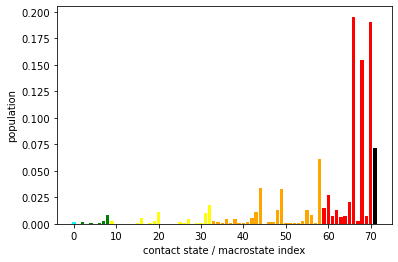

In [8]:
# Make a bar plot of the state populations, color-coded by the number of contacts
colors = ['cyan', 'green', 'yellow', 'orange', 'red', 'black']
bar_colors = [ colors[len(eval(c))] for c in df['contact_state']]
                          
from matplotlib import pyplot as plt
plt.figure()
plt.bar(range(n_macrostates), state_pops, color=bar_colors)
plt.xlabel('contact state / macrostate index')
plt.ylabel('population')
plt.show()

In [9]:
# Assign each microstate to the *new* sorted macrostate index (i.e. contact state)
micro_macroassignments = []
n_microstates = len(micro_state_repr)
for i in range(n_microstates):
    this_contact_state = micro_state_repr[i]
    row = df.loc[df['contact_state'] == this_contact_state]['macrostate_index']
    micro_macroassignments.append(int(row))

Verbose = False
if (Verbose):
    print('micro -> macro indices')
    for i in range(len(micro_macroassignments)):
        print(f'{i} --> {micro_macroassignments[i]}')
        
# write the macrostate_assignments to file
np.savetxt('./macrostate_assignments.txt', np.array(micro_macroassignments), fmt='%d')

In [10]:
# compile the macrostate multiplicities
macro_multiplicity = []
for i in range(n_macrostates):
    macro_multiplicity.append(contact_states[df['contact_state'][i]])
print(macro_multiplicity)

[11460, 188, 178, 107, 103, 231, 183, 1304, 556, 37, 13, 1, 6, 14, 2, 8, 29, 8, 11, 24, 15, 7, 18, 12, 10, 35, 18, 14, 13, 64, 37, 75, 103, 7, 1, 3, 6, 1, 4, 2, 2, 2, 3, 5, 2, 1, 4, 2, 2, 4, 4, 2, 5, 5, 5, 4, 2, 14, 38, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 5, 5, 1]


In [11]:
# compute average distances and squared distacnes for each macrostate
macro_distances = [ np.zeros((12,12)) for i in range(n_macrostates)]
macro_squared_distances = [ np.zeros((12,12)) for i in range(n_macrostates)]

for i in range(n_microstates):
    macro_index = micro_macroassignments[i]
    macro_distances[macro_index] += micro_distances[i] 
    macro_squared_distances[macro_index] += (micro_distances[i])**2 
    
# divide the sum by the multiplicity to get the average
for i in range(n_macrostates):
    macro_distances[i] /= macro_multiplicity[i]
    macro_squared_distances[i] /= macro_multiplicity[i]

Verbose = False
if Verbose:
    for i in range(n_macrostates):
        print('macrostate', i)
        print('macro_distances', macro_distances[i])
        print()
        print('macro_squared_distances', macro_squared_distances[i])

# write distances and sqdistances for each macrostate to file
outdir = './macrostate_distances'
if not os.path.exists(outdir):
    os.mkdir(outdir)
for i in range(n_macrostates):
    outfile = os.path.join(outdir, f'macro{str(i).zfill(2)}.dist.npy')
    np.save(outfile, macro_distances[i])
    outfile = os.path.join(outdir, f'macro{str(i).zfill(2)}.sqdist.npy')
    np.save(outfile, macro_squared_distances[i])


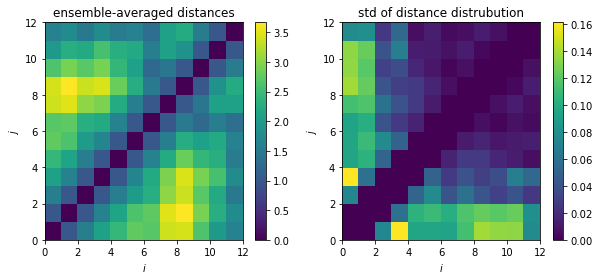

In [12]:
## Compute the macrostate population-weighted ensemble average distances,
## i.e. the experimental observables
obs_distances     = np.zeros((12,12))
## .. and the variance of the distance distributions
obs_distances_var = np.zeros((12,12))

assert np.sum(state_pops) == 1.0
for i in range(n_macrostates):
    obs_distances     += state_pops[i]*macro_distances[i]
    obs_distances_var += ((state_pops[i])**2) * (macro_squared_distances[i] - macro_distances[i]**2) # prop of errror
obs_distances_std = obs_distances_var**0.5

if (0):
    print('obs_distances', obs_distances)    
    print('obs_distances_std', obs_distances_std)
else:
    # write to file
    np.save('obs_distances.npy', obs_distances)
    np.save('obs_distances_std.npy', obs_distances_std)
    
plt.figure(figsize=(8.5,4))
plt.subplot(1,2,1)
plt.pcolor(obs_distances)
plt.colorbar()
plt.title('ensemble-averaged distances')
plt.xlabel('$i$')
plt.ylabel('$j$')

plt.subplot(1,2,2)
plt.pcolor(obs_distances_var**0.5)
plt.colorbar()
plt.title('std of distance distrubution')
plt.xlabel('$i$')
plt.ylabel('$j$')
plt.tight_layout()